In [389]:
import scipy
from scipy import stats as scistats

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

# Height of the dike problem

### Defining constants from the problem statement

In [390]:
student = 6

L = 500 * student
B = 30 * student


observations = np.array([111, 73, 57, 106, 134, 265, 295, 89, 71, 119, 52, 63, 212, 106, 29, 217, 172, 84, 131])
observations *= student

my_mean = 3 * (student + 1) 
my_std = student + 1

myclip_a = 3 * (student + 1) 
myclip_b = 10**10  # inf

observations

array([ 666,  438,  342,  636,  804, 1590, 1770,  534,  426,  714,  312,
        378, 1272,  636,  174, 1302, 1032,  504,  786])

#### Fitting lognorm and getting Flowrate

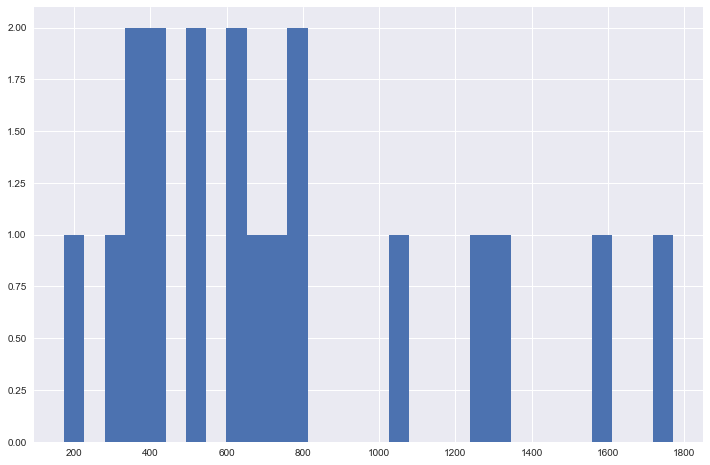

In [391]:
plt.hist(observations, bins=30);

In [397]:
shape, location, scale = scipy.stats.lognorm.fit(observations, f0=1)

shape, location, scale

(1, 129.86846443671786, 470.43352318635317)

Text(0.5, 1.0, 'pdf of lognorm distribution')

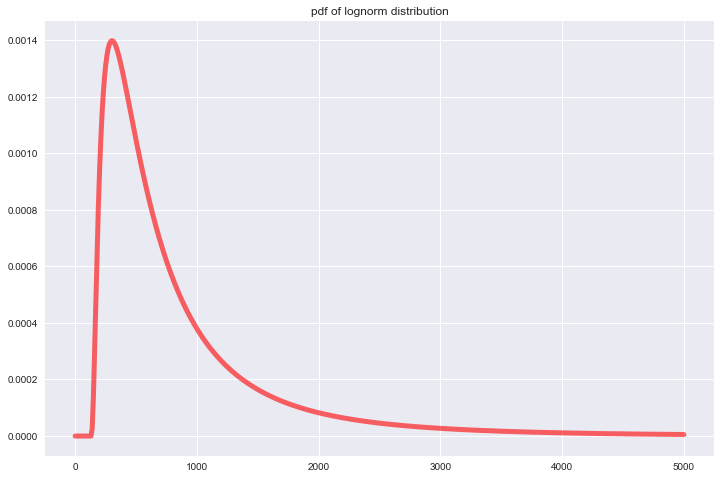

In [402]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 5000, 500)

plt.plot(x, scipy.stats.lognorm.pdf(x, shape, loc=location, scale=scale),
       'r-', lw=5, alpha=0.6, label='lognorm pdf')
plt.title("pdf of lognorm distribution")

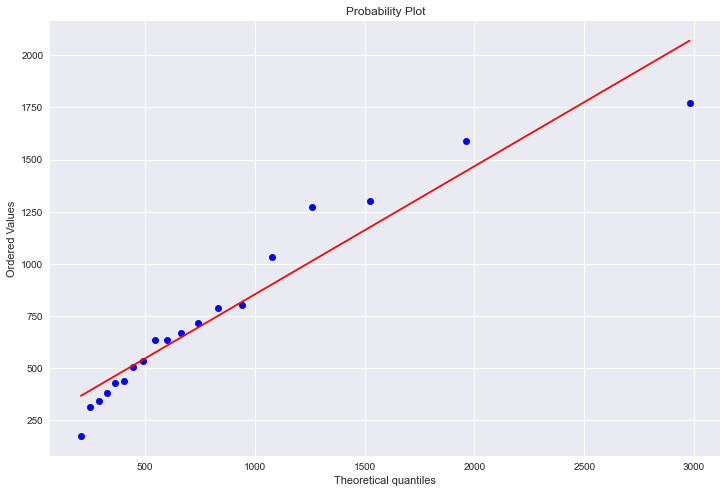

In [403]:
_ = scipy.stats.probplot(observations, dist=scipy.stats.lognorm(shape, loc=location, scale=scale), plot=plt.figure().add_subplot(111))

In [407]:
def get_flowrate():
    return scipy.stats.lognorm.rvs(shape, loc=location, scale=scale)
get_flowrate()

768.3552806171346

In [408]:
# triangular distributions:
def get_Z_v_and_Z_m():
    Z_v = np.random.triangular(49, 50, 51)
    Z_m = np.random.triangular(54, 55, 56)
    return Z_v, Z_m
get_Z_v_and_Z_m()

(50.03487298390654, 54.7760983814111)

### Truncated normal dist for Strickler coefficient


In [409]:
a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
a, b

(0.0, 1428571425.5714285)

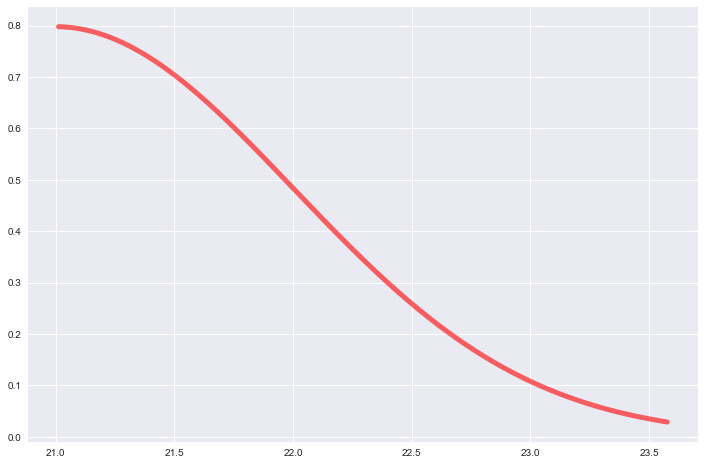

In [410]:
from scipy.stats import truncnorm

param1 = 3 * (student + 1) 

fig, ax = plt.subplots(1, 1)
x = np.linspace(truncnorm.ppf(0.01, a, b, loc=my_mean), truncnorm.ppf(0.99, a, b, loc=my_mean), 1000)

ax.plot(x, truncnorm.pdf(x, a, b, loc=my_mean),
       'r-', lw=5, alpha=0.6, label='truncnorm pdf')

In [411]:
def get_strickler_coefficient():
    return truncnorm.rvs(a, b, loc=my_mean)


## Performing a single simulation:

In [412]:
def run_single_simulation():
    Q = get_flowrate()
    K_s = get_strickler_coefficient()
    Z_v, Z_m = get_Z_v_and_Z_m()
    L = 500 * student
    B = 30 * student

    water_level = (Q / (K_s * B * np.sqrt( (Z_m - Z_v) / L ))) ** (3/5)

    return water_level

run_single_simulation()

7.3015075678501775

In [413]:
def run_monte_carlo(number_samples):
    results = np.array([run_single_simulation() for _ in range(number_samples)])
    return results

In [414]:
results = run_monte_carlo(100)
results.shape
results.max()

12.809688298727496

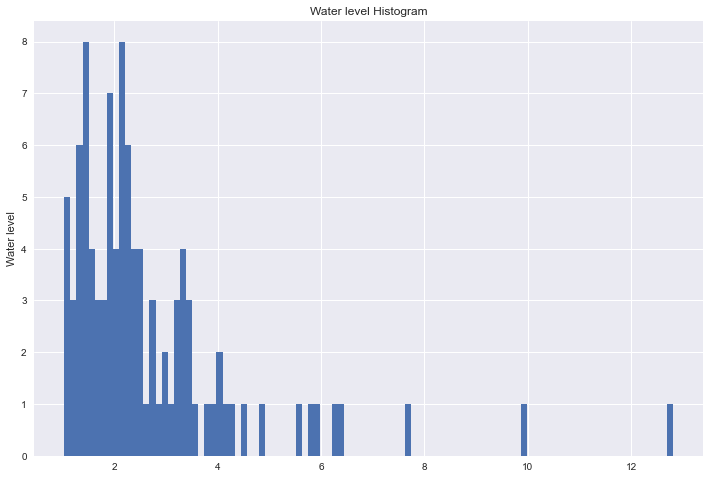

In [417]:
plt.hist(results, bins=100)
plt.gca().set(title='Water level Histogram', ylabel='Water level');
plt.plot();

### let's find the best fitting distribution for our task 

  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgauss
 51 / 104: 

Text(0, 0.5, 'Frequency')

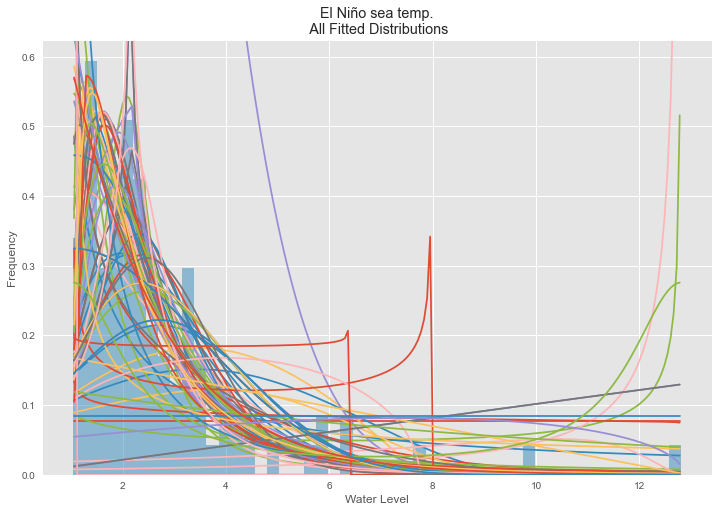

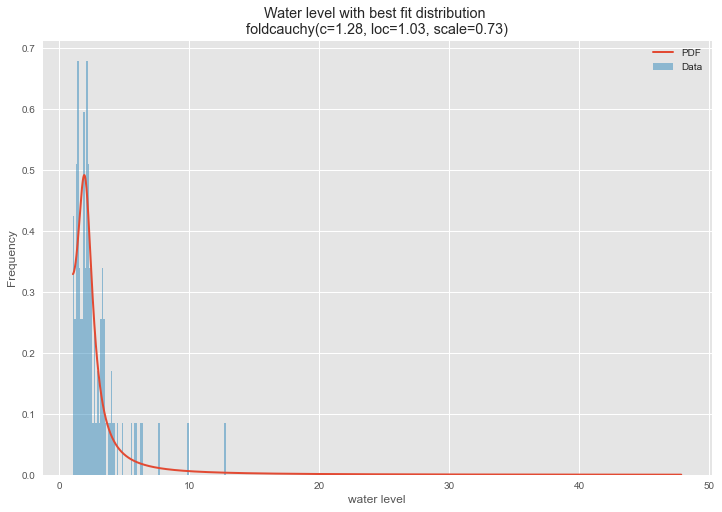

In [429]:
import warnings
import numpy as np
import scipy.stats as st
from scipy.stats._continuous_distns import _distn_names


# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    # end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
# data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
data = pd.Series(results)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Water Level')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=100, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'Water level with best fit distribution \n' + dist_str)
ax.set_xlabel(u'water level')
ax.set_ylabel('Frequency')

### Getting median value

In [427]:
median = np.quantile(results, 0.5)
print(f"Water level median value of Monte Carlo simulation, in meters:")

median

Water level median value of Monte Carlo simulation, in meters:


2.181507770467654

### Maximal value per 100 years:

In [428]:
years_100 = np.quantile(results, 0.99)
print("100-year flood level by Monte Carlo simulation, in meters:")
years_100

100-year flood level by Monte Carlo simulation, in meters:


9.909559878614777